Problem Statement: 

What symptoms / conditions are associated with people who died after receiving the COVID-19 Vaccine?

The problem I am trying to solve is classification, my label is column 'DIED' and my features are:

**SYMPTOM1**

**SYMPTOM2**

**SYMPTOM3**

**SYMPTOM4**

**SYMPTOM5**

**ALLERGIES**

**HOSPITAL**

**AGE_YRS**

**BIRTH_DEFECT**

**CUR_ILL**

**VAX_DATE**

**OTHER_MEDS**

**SEX**

**FORM_VERS**`

And my evaluation metric will be my F1 Score.

# Import libraries for Unsupervised learning and classification


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Data Preprocessing and data load:

In [ ]:
with open('2021VAERSDATA.csv', encoding="utf8", errors='ignore') as csv_file:
    vaccinationData = pd.read_csv(csv_file)
symptomData     = pd.read_csv('2021VAERSSYMPTOMS.csv')
vaccineTypeData = pd.read_csv('2021VAERSVAX.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
vaccinationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34121 entries, 0 to 34120
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      34121 non-null  int64  
 1   RECVDATE      34121 non-null  object 
 2   STATE         28550 non-null  object 
 3   AGE_YRS       30933 non-null  float64
 4   CAGE_YR       26791 non-null  float64
 5   CAGE_MO       83 non-null     float64
 6   SEX           34121 non-null  object 
 7   RPT_DATE      63 non-null     object 
 8   SYMPTOM_TEXT  34119 non-null  object 
 9   DIED          1957 non-null   object 
 10  DATEDIED      1798 non-null   object 
 11  L_THREAT      1259 non-null   object 
 12  ER_VISIT      11 non-null     object 
 13  HOSPITAL      4387 non-null   object 
 14  HOSPDAYS      2857 non-null   float64
 15  X_STAY        52 non-null     object 
 16  DISABLE       870 non-null    object 
 17  RECOVD        31264 non-null  object 
 18  VAX_DATE      32622 non-nu

In [ ]:
symptomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48110 entries, 0 to 48109
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         48110 non-null  int64  
 1   SYMPTOM1         48110 non-null  object 
 2   SYMPTOMVERSION1  48110 non-null  float64
 3   SYMPTOM2         39351 non-null  object 
 4   SYMPTOMVERSION2  39351 non-null  float64
 5   SYMPTOM3         31542 non-null  object 
 6   SYMPTOMVERSION3  31542 non-null  float64
 7   SYMPTOM4         24444 non-null  object 
 8   SYMPTOMVERSION4  24444 non-null  float64
 9   SYMPTOM5         18560 non-null  object 
 10  SYMPTOMVERSION5  18560 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 4.0+ MB


In [ ]:
vaccineTypeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34630 entries, 0 to 34629
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VAERS_ID         34630 non-null  int64 
 1   VAX_TYPE         34630 non-null  object
 2   VAX_MANU         34630 non-null  object
 3   VAX_LOT          23513 non-null  object
 4   VAX_DOSE_SERIES  34568 non-null  object
 5   VAX_ROUTE        26229 non-null  object
 6   VAX_SITE         26687 non-null  object
 7   VAX_NAME         34630 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


Merge the tables based upon VAERSID index column.

In [ ]:
data = pd.merge_ordered(vaccinationData,
                        symptomData,
                        how='inner',
                        on = 'VAERS_ID'
                        )
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48110 entries, 0 to 48109
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         48110 non-null  int64  
 1   RECVDATE         48110 non-null  object 
 2   STATE            41341 non-null  object 
 3   AGE_YRS          44372 non-null  float64
 4   CAGE_YR          38257 non-null  float64
 5   CAGE_MO          106 non-null    float64
 6   SEX              48110 non-null  object 
 7   RPT_DATE         88 non-null     object 
 8   SYMPTOM_TEXT     48108 non-null  object 
 9   DIED             2918 non-null   object 
 10  DATEDIED         2737 non-null   object 
 11  L_THREAT         2667 non-null   object 
 12  ER_VISIT         15 non-null     object 
 13  HOSPITAL         8740 non-null   object 
 14  HOSPDAYS         6193 non-null   float64
 15  X_STAY           79 non-null     object 
 16  DISABLE          1663 non-null   object 
 17  RECOVD      

# Label encoding, Normalization, and feature extraction for "DIED"


In [ ]:
le = LabelEncoder()
for column in symptomData:
    symptomData[column]=le.fit_transform(symptomData[column])
for column in vaccineTypeData:
    vaccineTypeData[column]=le.fit_transform(vaccineTypeData[column])   
for column in vaccinationData:
    vaccinationData[column]=le.fit_transform(vaccinationData[column])
for column in data:
    data[column]=le.fit_transform(data[column])

In [ ]:
label=data['DIED']
features=data[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'ALLERGIES', 'HOSPITAL', 'AGE_YRS', 'BIRTH_DEFECT', 'CUR_ILL', 'VAX_DATE', 'OTHER_MEDS', 'SEX', 'FORM_VERS', 'HISTORY','PRIOR_VAX','RECVDATE']].copy()

## Check for balanced label for data analysis

Label is unbalanced.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


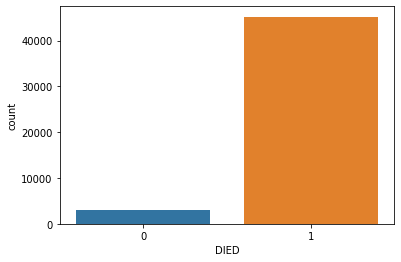

In [ ]:
sns.countplot(label)

Resampling label to balance data for training and testing (Under Sampling)

In [ ]:
data_undersampling = data[(data['DIED']==0)].copy()
data_undersampling = data[(data.DIED==0)].copy()

print((data_undersampling.DIED == 0).sum())

undersampled_data = resample(data[(data.DIED==1)], n_samples = 2918, random_state = 0)
data_undersampling = data_undersampling.append(undersampled_data)

print(data_undersampling.DIED.count())
print((data_undersampling.DIED == 0).sum())
print((data_undersampling.DIED == 1).sum())


undersampled_data_features = data_undersampling[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'ALLERGIES', 'HOSPITAL', 'AGE_YRS', 'BIRTH_DEFECT', 'CUR_ILL', 'VAX_DATE', 'OTHER_MEDS', 'SEX', 'FORM_VERS', 'HISTORY','PRIOR_VAX','RECVDATE']].copy()
undersampled_data_label = data_undersampling.DIED

2918
5836
2918
2918


Resampling label to balance data for training and testing (Over Sampling)

In [ ]:
data_oversampling  = data[(data.DIED==1)].copy()

print((data_oversampling.DIED == 1).sum())

oversampled_data  = resample(data[(data.DIED==0)], n_samples = 45192, random_state = 0)
data_oversampling  = data_oversampling.append(oversampled_data, ignore_index = True)

print(data_oversampling.DIED.count())
print((data_oversampling.DIED == 0).sum())
print((data_oversampling.DIED == 1).sum())

oversampled_data_features = data_oversampling[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5', 'ALLERGIES', 'HOSPITAL', 'AGE_YRS', 'BIRTH_DEFECT', 'CUR_ILL', 'VAX_DATE', 'OTHER_MEDS', 'SEX', 'FORM_VERS', 'HISTORY','PRIOR_VAX','RECVDATE']].copy()
oversampled_data_label = data_oversampling.DIED

45192
90384
45192
45192


Balanced labels and features.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


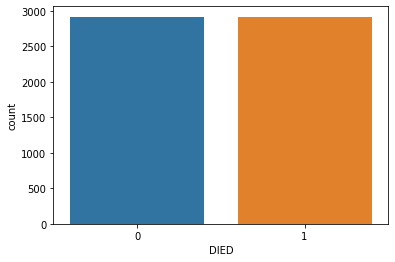

In [ ]:
sns.countplot(undersampled_data_label)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


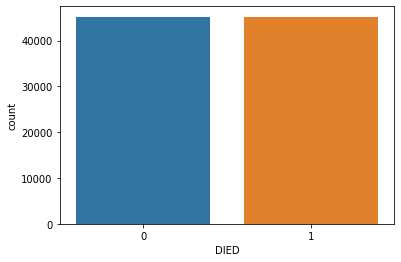

In [ ]:
sns.countplot(oversampled_data_label)

Re-normalize the new data

In [ ]:
scaler = StandardScaler()
scaler.fit(undersampled_data_features)
scaled_undersampled_data_features = scaler.transform(undersampled_data_features)

scaler = StandardScaler()
scaler.fit(oversampled_data_features)
scaled_oversampled_data_features = scaler.transform(oversampled_data_features)

# Under Sampled Data Analysis

## Data Visualization

**High correlations:**

SYM1, SYM2

SYM2, SYM3

SYM4, SYM5


**Medium correlations:**

ALLERGIES, OTHER_MED

ALLERGIES, CURR_ILL

**Conclusion:**

I only need SYM1 in order to analyze the data.


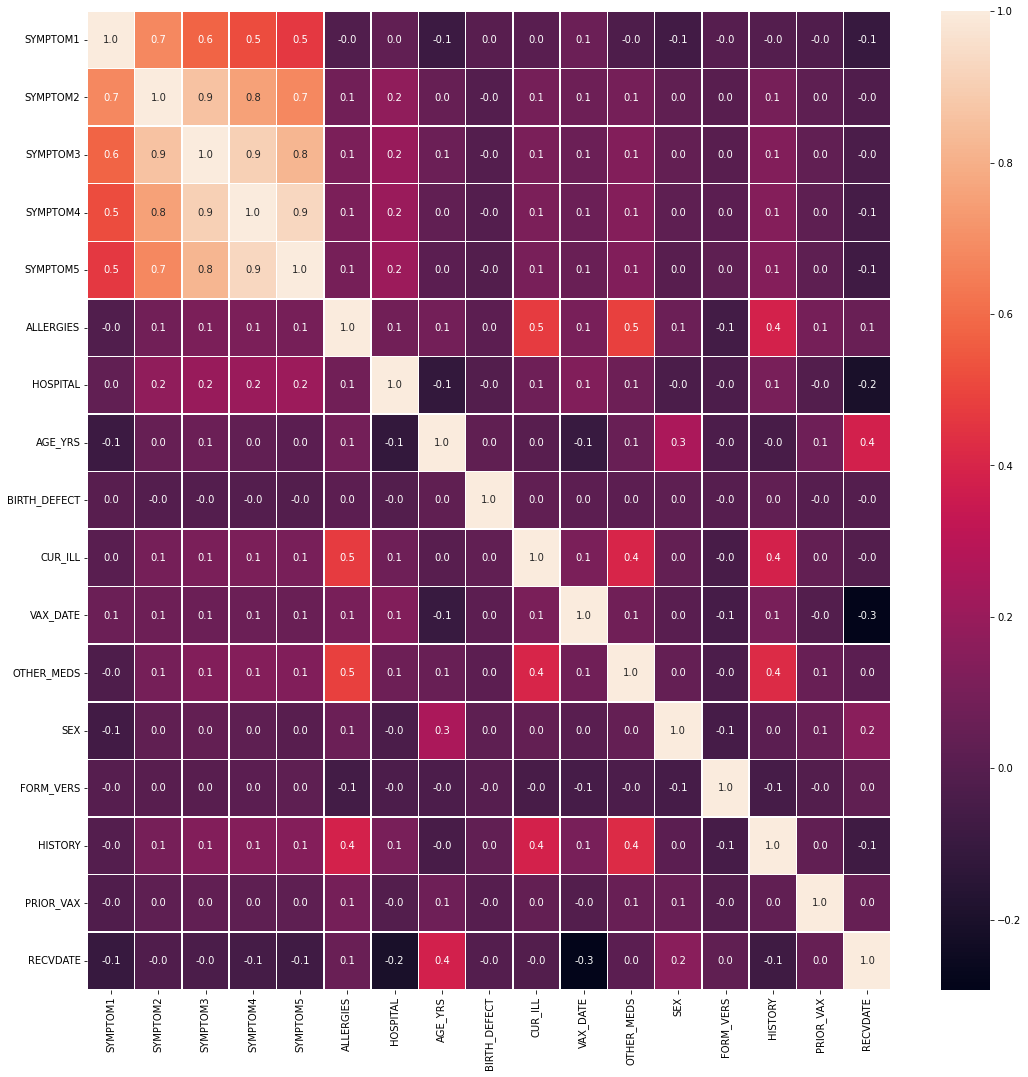

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(undersampled_data_features.corr(),annot=True, linewidths=.5, fmt= '.1f', ax=ax)

## Split Data, and train model.

There is a correlation between the people who died and the symptoms that they exhibited before death.

What were those symptoms?

Dropping symptoms(2-5) from the list that show a high correlation with SYMPTOM1 from heat map.

In [ ]:
undersampled_data_features = undersampled_data_features.drop(columns = ['SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'])

In [ ]:
X_training, X_testing, Y_training, Y_testing = train_test_split(undersampled_data_features, undersampled_data_label, test_size=0.3)

### Logistical regression on data to form baseline, omitting features that show high correlation with others.


In [ ]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_training,Y_training)

Y_testing_predicted=model.predict(X_testing)
Y_training_predicted=model.predict(X_training)

Given the f1_score bellow, we can assume the data is accurate and precise enough to continue further classification on, and there are properly categorized results.

In [ ]:
print('LGC result: Test Data')
print('f1_score: ', f1_score(Y_testing,Y_testing_predicted,average='weighted'))
print()
print('LGC result: Training Data')
print('f1_score: ', f1_score(Y_training,Y_training_predicted,average='weighted'))

LGC result: Test Data
f1_score:  0.7735167167952275

LGC result: Training Data
f1_score:  0.7842524206407181


Classification report from baseline:
The weighted avg of the data is .76, our data is balanced and can be used for further investigation.

In [ ]:
print(classification_report(Y_testing, Y_testing_predicted))
print(classification_report(Y_training, Y_training_predicted))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       892
           1       0.79      0.74      0.76       859

    accuracy                           0.77      1751
   macro avg       0.77      0.77      0.77      1751
weighted avg       0.77      0.77      0.77      1751

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      2026
           1       0.81      0.74      0.78      2059

    accuracy                           0.78      4085
   macro avg       0.79      0.78      0.78      4085
weighted avg       0.79      0.78      0.78      4085



## Data Classification


### Linear SVC Classification

In [ ]:
svc_model = LinearSVC(max_iter=10000)
svc_model.fit(X_training, Y_training)
svc_model_prediction=svc_model.predict(X_testing)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


A low F1 score means a different model needs to be used.
Or the data needs to be oversampled for the deaths.

In [ ]:
print('SVC result:')
print('f1_score: ', f1_score(Y_testing,svc_model_prediction,average='weighted'))

SVC result:
f1_score:  0.3526997579031476


### KNN Classification

Find how many miss classified data points there are in the set.

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_training,Y_training)

KNeighborsClassifier()

In [ ]:
Y_training_predicted_KNN=modelKNN.predict(X_training)
Y_testing_predicted_KNN=modelKNN.predict(X_testing)

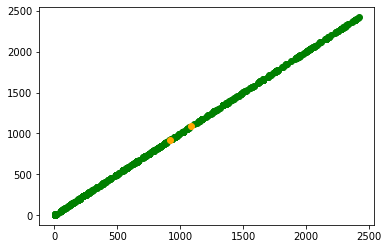

In [ ]:
plt.scatter(X_training['SYMPTOM1'][Y_training!=Y_training_predicted_KNN],X_training['SYMPTOM1'][Y_training!=Y_training_predicted_KNN],label='Wrong classification',color='green')
plt.scatter(X_training['SYMPTOM1'][Y_training==0].mean(),X_training['SYMPTOM1'][Y_training==0].mean(),c='orange')
plt.scatter(X_training['SYMPTOM1'][Y_training==1].mean(),X_training['SYMPTOM1'][Y_training==1].mean(),c='orange')

In [ ]:
KNN_MISCLASSIFIED_TRAINING = X_training['SYMPTOM1'][Y_training!=Y_training_predicted_KNN].count()
print("KNN Misclassified:     ",KNN_MISCLASSIFIED_TRAINING)
print("X_training data count: ", X_training['ALLERGIES'].count())
print("Percent Misclassified: ", KNN_MISCLASSIFIED_TRAINING/X_training['ALLERGIES'].count()*100, '%')

KNN Misclassified:      771
X_training data count:  4085
Percent Misclassified:  18.87392900856793 %


conclusion: 

20% of the data is being misinterpreted / misclassified, so a larger data set needs to be used.

# Over Sampled Data Analysis


## Data Visualization

**High correlations:**

SYM1, SYM2

SYM2, SYM3

SYM4, SYM5


**Medium correlations:**

ALLERGIES, OTHER_MED

ALLERGIES, CURR_ILL

**Conclusion:**

I only need SYM1 in order to analyze the data.


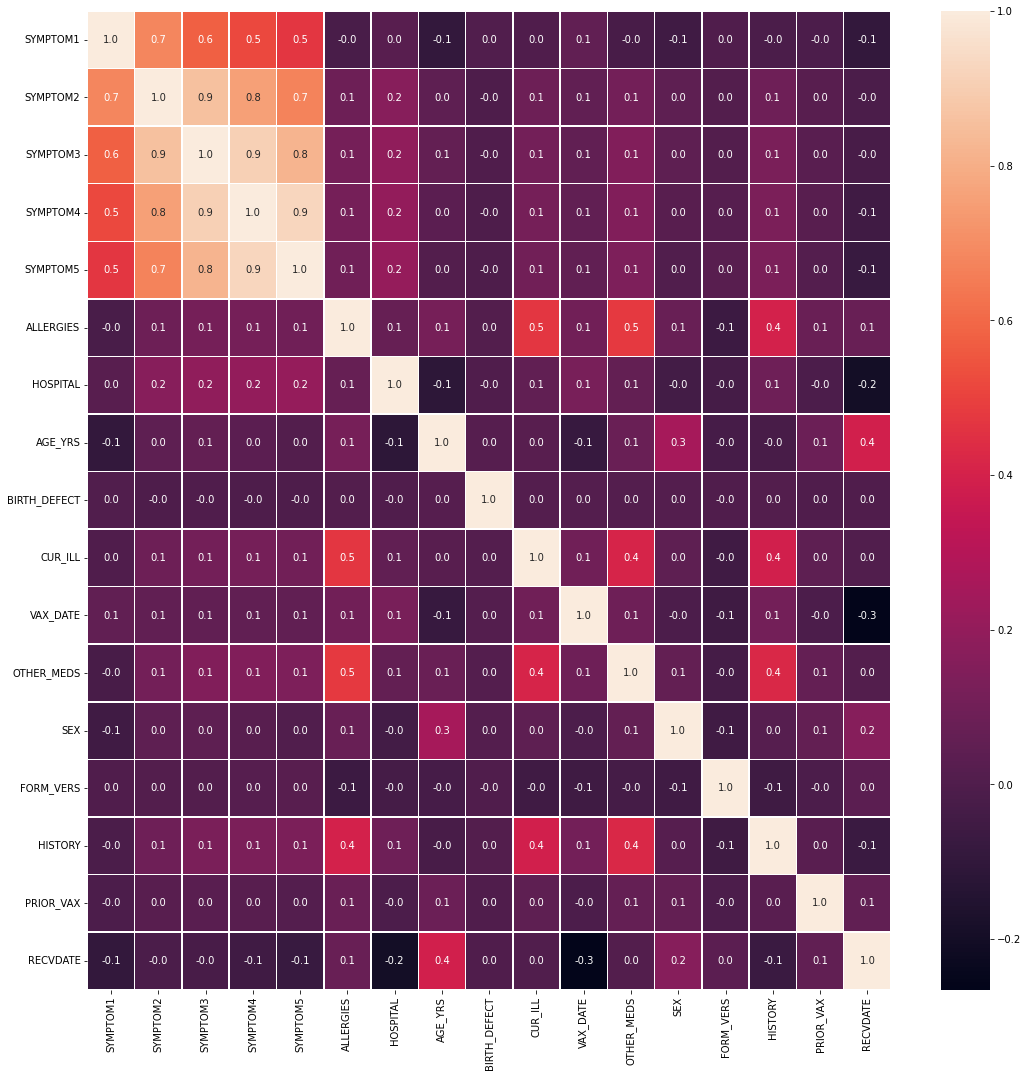

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(oversampled_data_features.corr(),annot=True, linewidths=.5, fmt= '.1f', ax=ax)

## Split Data, and train model.

There is a correlation between the people who died and the symptoms that they exhibited before death.

What were those symptoms?

Dropping symptoms(2-5) from the list that show a high correlation with SYMPTOM1 from heat map.

In [ ]:
oversampled_data_features = oversampled_data_features.drop(columns = ['SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5'])

In [ ]:
X_training, X_testing, Y_training, Y_testing = train_test_split(oversampled_data_features, oversampled_data_label, test_size=0.3)

### Logistical regression on data to form baseline, omitting features that show high correlation with others.


In [ ]:
model = LogisticRegression(max_iter = 10000)
model.fit(X_training,Y_training)

Y_testing_predicted=model.predict(X_testing)
Y_training_predicted=model.predict(X_training)

In [ ]:
print('LGC result: Test Data')
print('f1_score: ', f1_score(Y_testing,Y_testing_predicted,average='weighted'))
print()
print('LGC result: Training Data')
print('f1_score: ', f1_score(Y_training,Y_training_predicted,average='weighted'))

LGC result: Test Data
f1_score:  0.7807236851801865

LGC result: Training Data
f1_score:  0.7797837599148557


Classification report from baseline:

In [ ]:
print(classification_report(Y_testing, Y_testing_predicted))
print(classification_report(Y_training, Y_training_predicted))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79     13406
           1       0.82      0.73      0.77     13710

    accuracy                           0.78     27116
   macro avg       0.78      0.78      0.78     27116
weighted avg       0.78      0.78      0.78     27116

              precision    recall  f1-score   support

           0       0.76      0.83      0.79     31786
           1       0.81      0.73      0.77     31482

    accuracy                           0.78     63268
   macro avg       0.78      0.78      0.78     63268
weighted avg       0.78      0.78      0.78     63268



## Data Classification


### Linear SVC Classification

In [ ]:
svc_model = LinearSVC(max_iter = 1000)
svc_model.fit(X_training, Y_training)
svc_model_prediction=svc_model.predict(X_testing)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Higher F1 score means the oversampled data is the best.

In [ ]:
print('SVC result:')
print('f1_score: ', f1_score(Y_testing,svc_model_prediction,average='weighted'))

SVC result:
f1_score:  0.7214994090746107


From the confusion matrix bellow, we can tell that a fraction of the data was miss classified, and a strong majority of the data 10000+ records. Were classified as they should be. The true positives and true negatives out weigh the miss classified results.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


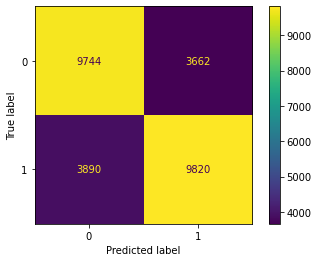

In [ ]:
plot_confusion_matrix(svc_model,X_testing,Y_testing)

### KNN Classification

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_training,Y_training)
modelKNN_prediction = modelKNN.predict(X_testing)

In [ ]:
Y_training_predicted_KNN=modelKNN.predict(X_training)
Y_testing_predicted_KNN=modelKNN.predict(X_testing)

Visualization of misclassified records.

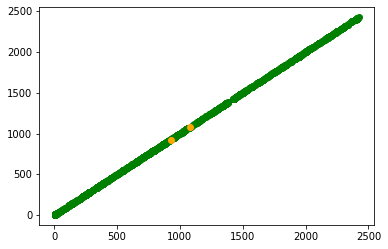

In [ ]:
plt.scatter(X_training['SYMPTOM1'][Y_training!=Y_training_predicted_KNN],X_training['SYMPTOM1'][Y_training!=Y_training_predicted_KNN],label='Wrong classification',color='green')
plt.scatter(X_training['SYMPTOM1'][Y_training==0].mean(),X_training['SYMPTOM1'][Y_training==0].mean(),c='orange')
plt.scatter(X_training['SYMPTOM1'][Y_training==1].mean(),X_training['SYMPTOM1'][Y_training==1].mean(),c='orange')

In [ ]:
KNN_MISCLASSIFIED_TRAINING = X_training['SYMPTOM1'][Y_training!=Y_training_predicted_KNN].count()
print("KNN Misclassified:     ",KNN_MISCLASSIFIED_TRAINING)
print("X_training data count: ", X_training['ALLERGIES'].count())
print("Percent Misclassified: ", KNN_MISCLASSIFIED_TRAINING/X_training['ALLERGIES'].count()*100, '%')

KNN Misclassified:      3020
X_training data count:  63268
Percent Misclassified:  4.77334513498135 %


In [ ]:
print('f1_score: ', f1_score(Y_testing,modelKNN_prediction,average='weighted'))

f1_score:  0.9313235531758575


A much better result from oversampling, so we will use this for our data clustering.

# Unsupervised Data Clustering (KMeans):
The KNN model for the over sampled results show that there is a strong accuracy and precision behind this model. It only missclassified 5% of the data compared to 20% for the undersampled data. This shows that KNN classification with the oversampled results should be used for the Unsupervised learning portion since the data is properly classified 95% of the time. Which will give the machine learning algorithm ample data to teach itself with.


In [ ]:
X_training = X_training.values
X_testing = X_testing.values

In [ ]:
X_testing.shape

(27116, 13)

In [ ]:
X_training.shape

(63268, 13)

2
3
4
5
6


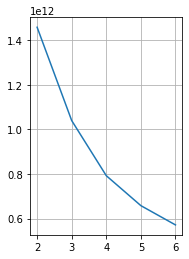

In [ ]:

sse=[]
for k in range(2, 7):
  print(k)
  kmeans = KMeans(n_clusters=k, init= "random")
  kmeans.fit(X_training,Y_training)
  sse.append(kmeans.inertia_)
plt.subplot(1,2,1)
plt.plot([i for i in range(2,7)],sse)
plt.grid()
# plt.subplot(1,2,2)
# plt.plot([i for i in range(2,15)],slc,color='red')
# plt.grid()

2
3
4
5
6


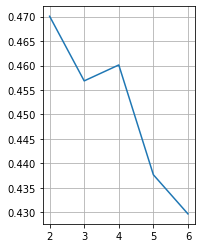

In [ ]:
from sklearn.metrics import silhouette_score


slc=[]
for k in range(2, 7):
  print(k)
  kmeans = KMeans(n_clusters=k, init= "random")
  kmeans.fit(X_training,Y_training)
  slc.append(silhouette_score(X_training, kmeans.labels_, sample_size=35000, random_state=10))
plt.subplot(1,2,1)
plt.plot([i for i in range(2,7)],slc)
plt.grid()

Best K = 4

In [ ]:
kmeans = KMeans(n_clusters=4, init= "random")
kmeans.fit(X_training,Y_training)
centroids = kmeans.cluster_centers_
centroid_array = np.array(centroids).astype(int)
labels = kmeans.labels_


y_pred = kmeans.predict(X_testing)


In [ ]:
centroids[0]

array([9.88528596e+02, 6.87572725e+03, 8.33782907e-01, 8.13207225e+01,
       9.99419538e-01, 3.88596258e+03, 1.23690306e+02, 1.43848235e+04,
       4.73827978e-01, 9.92419845e-01, 1.05476105e+04, 1.31043323e+03,
       3.64969099e+01])

Im not sure how to do KNN classification on these centroids, I would love to learn in the future.

In [ ]:
labels.shape

(63268,)

In [ ]:

print('KMeans result:')

print('f1_score: ', f1_score(Y_testing,y_pred,average='weighted'))


KMeans result:
f1_score:  0.331508367568963


To improve this f1_score would take some time, and modification to the original data.
This is obviously worse than what was predicted with KNN classification.
I tried SOM to classify the data, but the error quant, was 1500. Which is much greater than anything that would feasibly work under those conditions.

# Results and Conclussion

In conclusion, the data to support the classification results for KNN were shown for the oversampled data set. Implementing the same results on the centroids produced from KMeans was more difficult than expected. In order to improve this algorithm, time would need to be spent on figuring out how to do a KNN analysis on the clusters produced by KMeans. Although, from the initial tests, it can be seen that a 93% f1_score for the training data was expected.
Recieving a score 1/3 the size of that was far from perfect.
From the data we can tell that KNN classified the data correctly as it relates to my label "DIED". The undersampled data failed to capture a wide enough data selection to compete with the over sampling and was removed from the testing parameters. From the heat plots I was able to fix any unbalanced data, and the heatmaps showed which "features" were correlated with eachother and could be omitted. The SVC models produced unfavorable results the first time which lead me to resample my data set and try again with KNN classifier to get my final results.